In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
def remove_dup(above, T):
    k = above.tolist()
    i = 0
    while i<len(k)-1:
        if k[i] > k[i+1]-T:
            k.pop(i+1)
            i-=1
        i+=1
    i = 0
    return np.array(k)

In [4]:
def align_signal(x, index, T):
    sig = x[index:index+T]
    cent = np.where(sig==np.max(sig))[0][0]
    aligned_start = index + cent-T//2
    return x[aligned_start:aligned_start+T]

In [5]:
def align_index(x, index, T):
    sig = x[index:index+T]
    cent = np.where(sig==np.max(sig))[0][0]
    return index + cent

In [31]:
def detect_and_align_spikes(x, n_samples, factor=3.5):
    threshold = factor * np.std(x[:500])
    above = np.where(x>threshold)[0]
    spikes_starts = remove_dup(above, n_samples)
    spikes = np.array([align_signal(x, index, n_samples) for index in spikes_starts])
    peak_indices = np.array([align_index(x, index, n_samples) for index in spikes_starts])
    return spikes, peak_indices

In [7]:
def plot_marked(x, i_st, i_end, markers, markers_types):
    selection = np.where(np.logical_and(markers>=i_st, markers<i_end))[0]
    sig = np.array(x[i_st: i_end])
    colors = np.array(['b', 'r', 'g', 'c', 'm', 'y', 'k'])
    marker_colors = colors[markers_types[selection]]
#     y = [1e-4] * len(selection)
    plt.subplots(figsize=(16,8))
    plt.title("Detected Spikes")
    plt.plot(sig, zorder=1)
    xs = np.array(markers[selection]-i_st, dtype=np.int64)
    ys = sig[xs]
    plt.scatter(xs, ys, c=marker_colors, marker="*", zorder=2)

In [8]:
def detect_spikes_and_pca(x, factor, filename, sampling_rate=24414, spike_duration_in_ms=2):
    spike_n_samples = round(spike_duration_in_ms*sampling_rate/1000)
    spikes, peaks_indices = detect_and_align_spikes(x, spike_n_samples, factor)
    pca = PCA(n_components = 2)
    pca.fit(spikes)
    spikes_tr = pca.transform(spikes)
    plt.figure(figsize=(16,6))
    plt.scatter(spikes_tr[:,0], spikes_tr[:,1])
    plt.savefig(filename)
    return spikes, peaks_indices

In [15]:
def cluster_and_mark_spikes(x, spikes, peaks_indices, n_clusters, filename, i_st=0, i_end=20000):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(spikes) #original data
    plot_marked(x, i_st, i_end, peaks_indices, kmeans.labels_)
    plt.savefig(filename)
    return kmeans

In [10]:
data = np.genfromtxt('Data.txt')
x = data
x0 = x[:,0]
x1 = x[:,1]

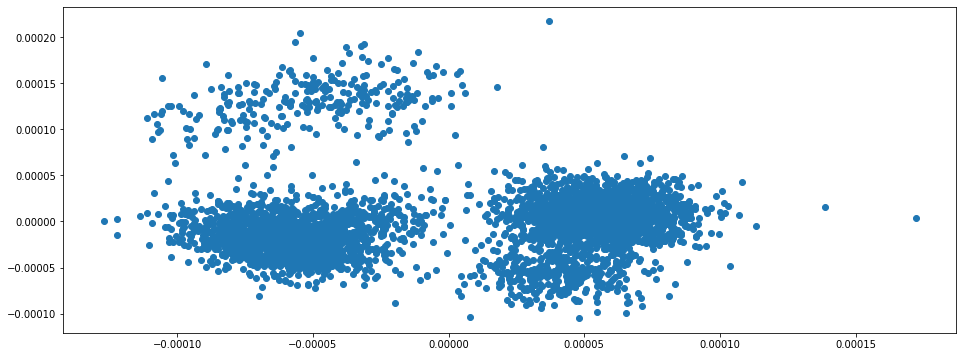

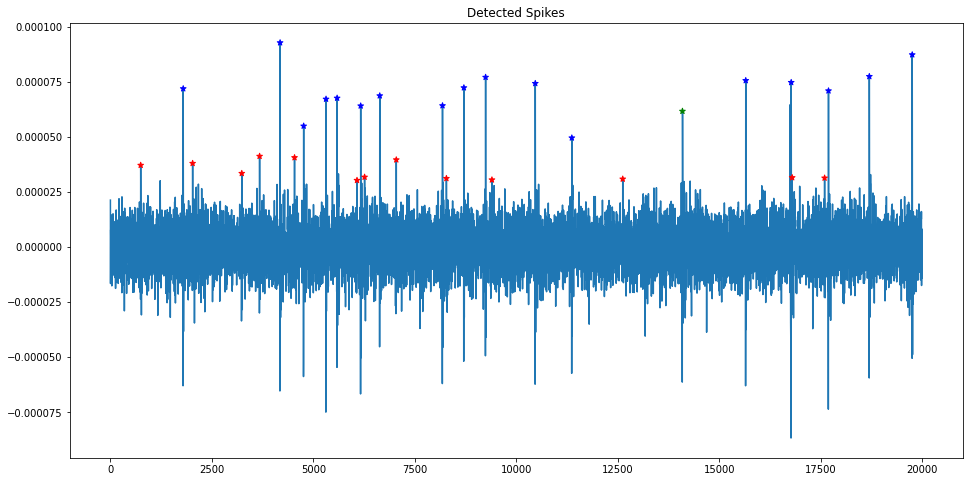

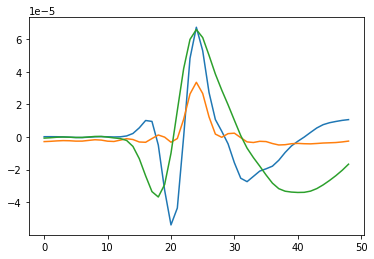

In [51]:
spikes_135, peaks_indices_135 = detect_spikes_and_pca(x0, 3.5, "FeatureSpace_1_3_5.jpg")
# 3 Clusters 
kmeans_135 = cluster_and_mark_spikes(x0, spikes_135, peaks_indices_135, 
                                 n_clusters=3, filename='DetectedSpikes_1_3_5.jpg')#, i_st=0, i_end=1500)
plt.figure()
for y in np.unique(kmeans_135.labels_):
    plt.plot(np.mean(spikes_135[np.where(kmeans_135.labels_==y)], axis=0))

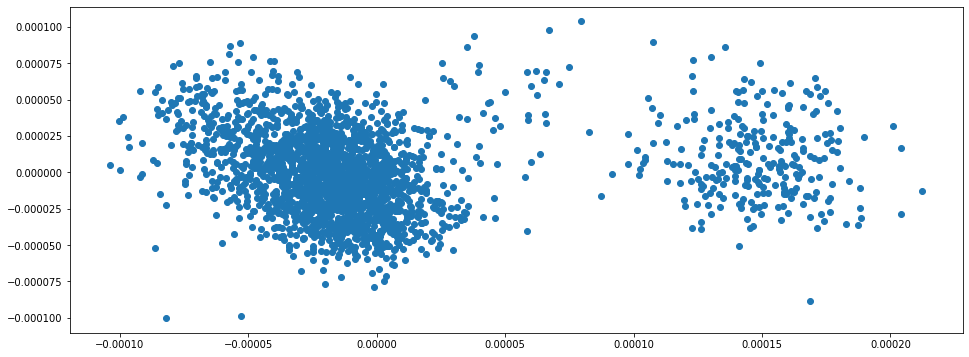

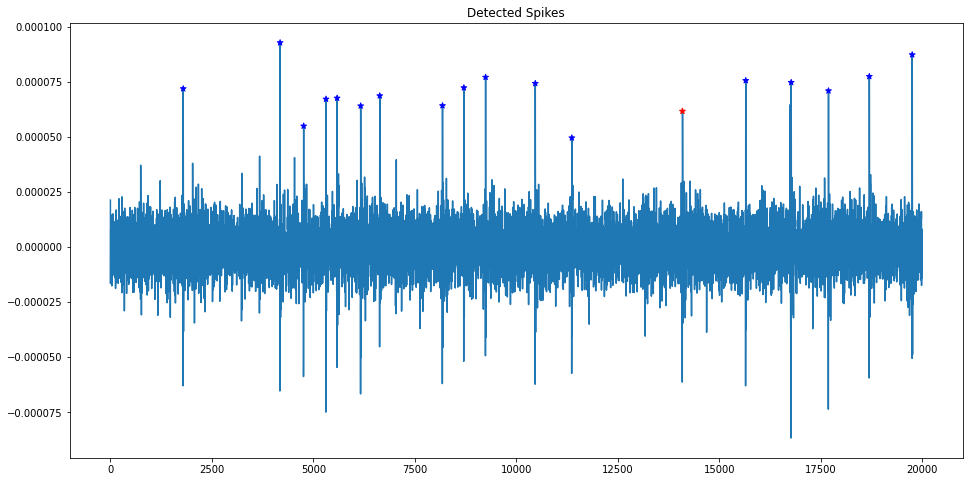

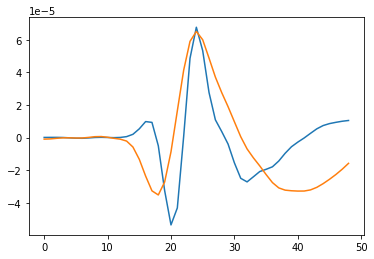

In [53]:
spikes_15, peaks_indices_15 = detect_spikes_and_pca(x0, 5, "FeatureSpace_1_5.jpg")
# 2 clusters
kmeans_15 = cluster_and_mark_spikes(x0, spikes_15, peaks_indices_15, n_clusters=2, filename='DetectedSpikes_1_5.jpg')
plt.figure()
for y in np.unique(kmeans_15.labels_):
    plt.plot(np.mean(spikes_15[np.where(kmeans_15.labels_==y)], axis=0))

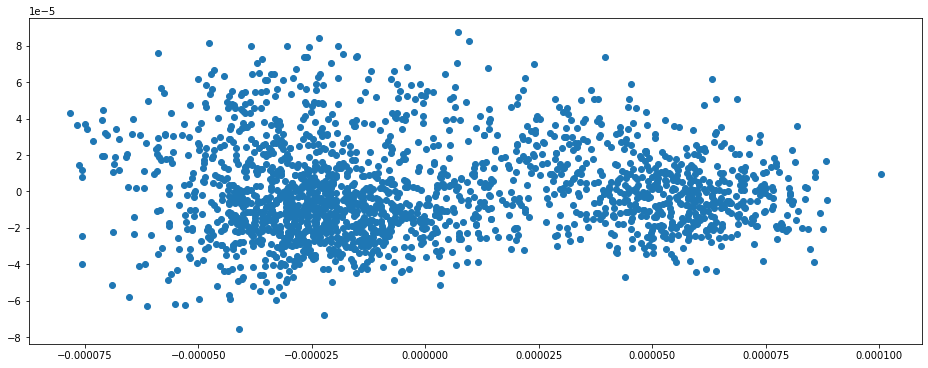

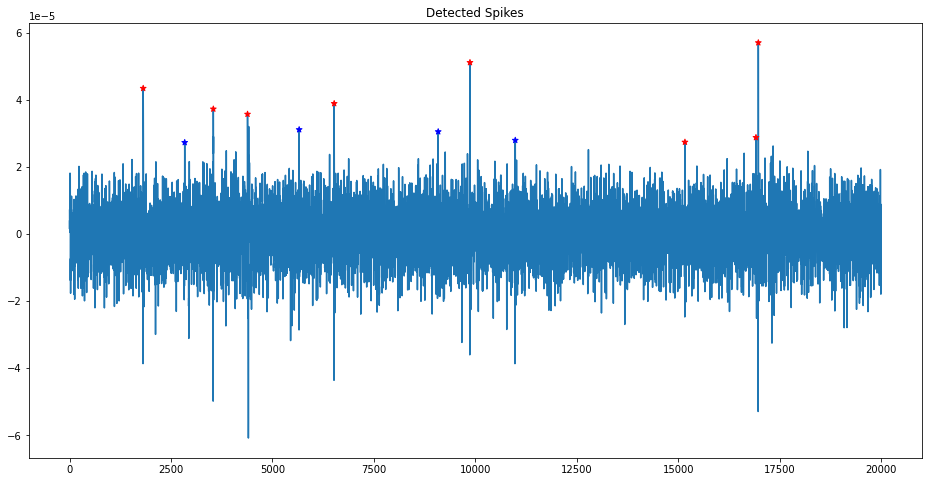

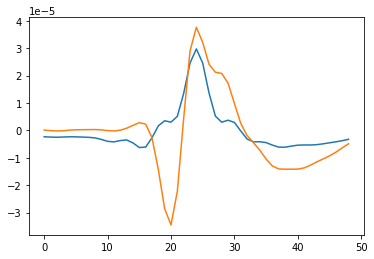

In [54]:
spikes_235, peaks_indices_235 = detect_spikes_and_pca(x1, 3.5, "FeatureSpace_2_3_5.jpg")
# 2 clusters
kmeans_235 = cluster_and_mark_spikes(x1, spikes_235, peaks_indices_235, n_clusters=2, filename='DetectedSpikes_2_3_5.jpg')
plt.figure()
for y in np.unique(kmeans_235.labels_):
    plt.plot(np.mean(spikes_235[np.where(kmeans_235.labels_==y)], axis=0))

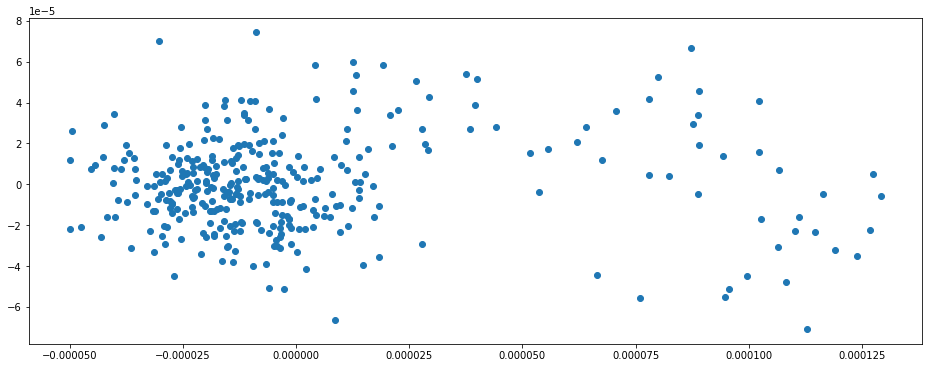

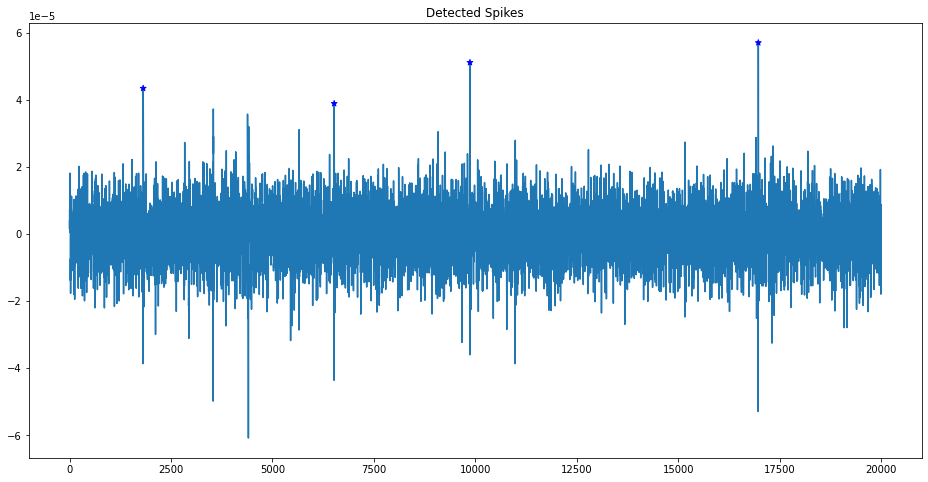

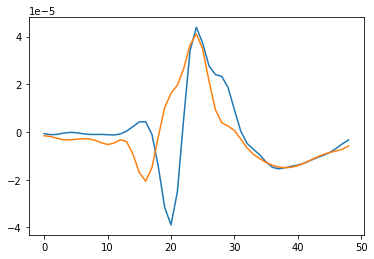

In [55]:
spikes_25, peaks_indices_25 = detect_spikes_and_pca(x1, 5, "FeatureSpace_2_5.jpg")
# 2 clusters
kmeans_25 = cluster_and_mark_spikes(x1, spikes_25, peaks_indices_25, n_clusters=2, filename='DetectedSpikes_2_5.jpg')
plt.figure()
for y in np.unique(kmeans_25.labels_):
    plt.plot(np.mean(spikes_25[np.where(kmeans_25.labels_==y)], axis=0))

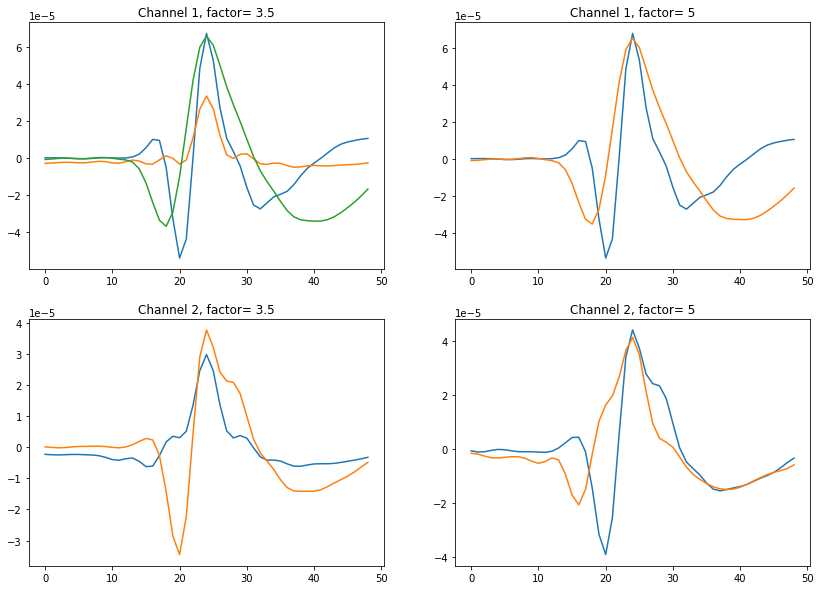

In [63]:
plt.subplots(2,2, figsize=(14,10))
plt.subplot(2,2,1)
plt.title("Channel 1, factor= 3.5")
for y in np.unique(kmeans_135.labels_):
    plt.plot(np.mean(spikes_135[np.where(kmeans_135.labels_==y)], axis=0))
plt.subplot(2,2,2)
plt.title("Channel 1, factor= 5")
for y in np.unique(kmeans_15.labels_):
    plt.plot(np.mean(spikes_15[np.where(kmeans_15.labels_==y)], axis=0))
plt.subplot(2,2,3)
plt.title("Channel 2, factor= 3.5")
for y in np.unique(kmeans_235.labels_):
    plt.plot(np.mean(spikes_235[np.where(kmeans_235.labels_==y)], axis=0))
plt.subplot(2,2,4)
plt.title("Channel 2, factor= 5")
for y in np.unique(kmeans_25.labels_):
    plt.plot(np.mean(spikes_25[np.where(kmeans_25.labels_==y)], axis=0))